### 基本概念
Numpy 的核心是连续的多维数组。  
Numpy中的数组叫做```np.ndarray```，也可以使用别名```np.array```。  
但这里的np.array与Python标准库中的array.array是不同的。
下列是几个```ndarray```中的重要属性：  

**ndarray.ndim**  
　　数组的维数。  
**ndarray.shape**  
　　数组的形状。  
**ndarray.size**  
　　数组的元素个数。  
**ndarray.dtype**  
　　数组的元素类型。  
  
例子：  

In [10]:
import numpy as np
data=np.arange(15).reshape(3,5)
print(data)
print(data.shape)
print(data.ndim)
print(data.size)
print(data.dtype.name)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)
2
15
int32


#### 数组的创建
创建数组有多种方式。你可以使用```np.array```直接用Python的元组和列表来创建。

In [11]:
import numpy as np
a=np.array([1,2,3])
print(a.dtype)
b=np.array([1.1,2.2,3.3])
print(b.dtype)
c=np.array([(1,2,3),(4.5,5,6)]) #创建二维数组
print(c)
d=np.array([(1,2),(3,4)],dtype=complex) #数组的类型可以在创建时显式声明
print(d)

int32
float64
[[ 1.   2.   3. ]
 [ 4.5  5.   6. ]]
[[ 1.+0.j  2.+0.j]
 [ 3.+0.j  4.+0.j]]


通常，数组的元素的未知的，但是形状确实已知的。所以NumPy提供了多种创建空数组的方法。  
```np.zeros``` 创建全是0的数组。  
```np.ones``` 创建全是1的数组。  
```np.empty``` 创建初始值是随机数的数组。  
需要注意的是上述方法创建的数组元素的类型是 ```float64```

In [9]:
e=np.zeros((3,4))
print(e)
f=np.ones((2,3,4),dtype=np.int16)#可以更改数据类型
print(f)
g=np.empty((2,3))
print(g)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
[[ 1.   2.   3. ]
 [ 4.5  5.   6. ]]


为了创建列表，NumPy提供了和 ```range``` 类似的函数。  
```np.arange(start,end,step)```

In [10]:
a=np.arange(10,30,5)
print(a)
b=np.arange(0,2,0.3)#同样可以接收浮点数
print(b)

[10 15 20 25]
[ 0.   0.3  0.6  0.9  1.2  1.5  1.8]


在生成浮点数列表时，最好不要使用```np.arange```，而是使用```np.linspace```。  
```np.linspace(start,stop,num)```

In [11]:
np.linspace(0,2,9)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

#### 打印数组
当你打印一个数组时，NumPy显示数组的方式和嵌套的列表类似，但是会遵循以下布局：
 - 最后一维从左到右显示
 - 第二维到最后一维从上到下显示
 - 剩下的同样从上到下显示，以空行分隔
 
一维数组显示成一行，二维数组显示成矩阵，三维数组显示成矩阵的列表。
    

In [12]:
a=np.arange(6)
print(a)
b=np.arange(12).reshape(4,3)
print(b)
c=np.arange(24).reshape(2,3,4)
print(c)

[0 1 2 3 4 5]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


当一个数组元素太多，不方便显示时，NumPy会自动数组的中间部分，只显示边角的数据。

In [13]:
print(np.arange(10000))

[   0    1    2 ..., 9997 9998 9999]


#### 基本操作
数组的算数计算是在元素层级运算的。计算结果会存在一个新创建的数组中。

In [1]:
import numpy as np
a=np.array([20,30,40,50])
b=np.arange(4)
print(b)
c=a-b
print(c)
print(b**2)
print(10*np.sin(a))
print(a<35)

[0 1 2 3]
[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True  True False False]


在NumPy中```*```号仍然表示乘法，矩阵乘积用```np.dot```来计算。

In [14]:
A=np.array([(1,1),(0,1)])
B=np.array([(2,0),(3,4)])
print(A*B)
print(A.dot(B))
print(np.dot(A,B))

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


类似于```+=```和```*=```的运算是直接在现有数组上计算的，没有创建新的数组。Numpy中的计算同样也是向上转型的，可以简单理解成浮点数和整数运算的结果是浮点数。

In [20]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))
a*=3
print(a)
b += a
print(b)
# a += b                  # 浮点数不会自动转换成整数

[[3 3 3]
 [3 3 3]]
[[ 3.87773354  3.29818069  3.15185141]
 [ 3.50104791  3.33250152  3.18660189]]


```np.ndarray```提供了许多一元操作。比如数组求和、求最大最小值等。

In [3]:
a=np.random.random((2,3))
print(a)
print(a.sum())
print(a.mean())
print(a.max())
print(a.min())

[[ 0.42337944  0.6090745   0.77043582]
 [ 0.08310096  0.67137503  0.07509765]]
2.6324633982
0.4387438997
0.770435824498
0.0750976491123


默认的，这些一元操作是对整个数组进行计算，没有考虑到数组的形状。你可以设置```axis```参数来指定运算方向。```axis```表示第n维（从0开始）。

In [24]:
b=np.arange(12).reshape(3,4)
print(b)
print(b.sum(axis=0)) #对第0维的元素求和
print(b.sum(axis=1)) #对第1维的元素求和
print(b.min(axis=1))
print(b.cumsum(axis=1)) #对第1维的元素累加求和

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21]
[ 6 22 38]
[0 4 8]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


#### 广播函数
NumPy提供了熟知的数学方法，如：sin、cos、exp等。在NumPy中，这些方法被称作广播函数。这些函数会对数组中的每个元素进行计算，返回计算后的数组。

In [8]:
B=np.arange(3)
print(B)
print(np.exp(B))
print(np.sqrt(B))
C=np.array([2,-1,4])
print(np.add(B,C))
print(B+C)


[0 1 2]
[ 1.          2.71828183  7.3890561 ]
[ 0.          1.          1.41421356]
[2 0 6]
[2 0 6]


#### 索引、切片和迭代
一维数组可以被索引、切片和迭代，就和Python中的列表一样。

In [29]:
a=np.arange(10)**3
print(a)
print(a[2])
print(a[2:5])
a[:6:2]=-1000
print(a)
print(a[::-1])
for i in a:
    print(i)

[  0   1   8  27  64 125 216 343 512 729]
8
[ 8 27 64]
[-1000     1 -1000    27 -1000   125   216   343   512   729]
[  729   512   343   216   125 -1000    27 -1000     1 -1000]
-1000
1
-1000
27
-1000
125
216
343
512
729


多维数组可以在每一个维度有一个索引，这些索引构成元组来进行访问。

In [32]:
def f(x,y):return 10*x+y
b=np.fromfunction(f,(5,4),dtype=int)
print(b)
print(b[2,3])
print(b[0:5,1])
print(b[:,1])
print(b[1:3,:])


[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]
23
[ 1 11 21 31 41]
[ 1 11 21 31 41]
[[10 11 12 13]
 [20 21 22 23]]


```...```表示对索引的省略。如下所示：

In [35]:
c = np.array( [[[  0,  1,  2],               # 三维数组
                [ 10, 12, 13]],
               [[100,101,102],
                [110,112,113]]])
print(c.shape)
print(c[1,...])                                   # 和 c[1,:,:] 、 c[1]效果相同
print(c[...,2])                                   # 和c[:,:,2]效果相同


(2, 2, 3)
[[100 101 102]
 [110 112 113]]
[[  2  13]
 [102 113]]


In [ ]:
对多维数组的迭代是在第一维进行迭代的。

In [36]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


如果需要遍历多维数组的所有元素，可以使用```flat```这个属性。

In [37]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


### 数组形状操作
#### 更改数组的形状
有很多种方式可以更改数组的形状。下列的函数都没有对原数组进行更改，而是返回了一个更改后的新数组。

In [43]:
a = np.floor(10*np.random.random((3,4)))
print(a.ravel()) #返回铺平后的数组
print(a.reshape(6,2)) #按照指定的形状更改
print(a.T)#返回转置矩阵

[ 0.  0.  4.  5.  7.  2.  2.  5.  1.  2.  5.  5.]
[[ 0.  0.]
 [ 4.  5.]
 [ 7.  2.]
 [ 2.  5.]
 [ 1.  2.]
 [ 5.  5.]]
[[ 0.  7.  1.]
 [ 0.  2.  2.]
 [ 4.  2.  5.]
 [ 5.  5.  5.]]


如果一个维度填的是-1，则该维度的形状会自动进行计算

In [45]:
print(a.reshape(3,-1))

[[ 0.  0.  4.  5.]
 [ 7.  2.  2.  5.]
 [ 1.  2.  5.  5.]]


#### 堆砌不同的数组
多个数组可以按照不同的轴合在一起

In [5]:
a=np.floor(10*np.random.random((2,2)))
print(a)
b=np.floor(10*np.random.random((2,2)))
print(b)
print(np.vstack((a,b)))#垂直方向堆砌
print(np.hstack((a,b)))#水平方向堆砌
from numpy import newaxis
print(a[:,newaxis])

[[ 5.  9.]
 [ 5.  7.]]
[[ 7.  0.]
 [ 3.  7.]]
[[ 5.  9.]
 [ 5.  7.]
 [ 7.  0.]
 [ 3.  7.]]
[[ 5.  9.  7.  0.]
 [ 5.  7.  3.  7.]]
[[ 5.  9.  7.  0.]
 [ 5.  7.  3.  7.]]
[[[ 5.  9.]]

 [[ 5.  7.]]]
[[[ 5.  9.]
  [ 7.  0.]]

 [[ 5.  7.]
  [ 3.  7.]]]


#### 将一个数组划分为多个更小的数组
使用```hsplit```，```vsplit```可以对数组按照水平方向和垂直方向进行划分。

In [46]:
a=np.floor(10*np.random.random((2,12)))
print(a)
print(np.hsplit(a,3))
print(np.hsplit(a,(1,2,3)))#在第一列，第二列，第三列进行划分

[[ 9.  0.  4.  0.  4.  8.  7.  0.  5.  3.  7.  4.]
 [ 9.  7.  4.  7.  8.  2.  0.  2.  7.  6.  5.  8.]]
[array([[ 9.,  0.,  4.,  0.],
       [ 9.,  7.,  4.,  7.]]), array([[ 4.,  8.,  7.,  0.],
       [ 8.,  2.,  0.,  2.]]), array([[ 5.,  3.,  7.,  4.],
       [ 7.,  6.,  5.,  8.]])]
[array([[ 9.],
       [ 9.]]), array([[ 0.],
       [ 7.]]), array([[ 4.],
       [ 4.]]), array([[ 0.,  4.,  8.,  7.,  0.,  5.,  3.,  7.,  4.],
       [ 7.,  8.,  2.,  0.,  2.,  7.,  6.,  5.,  8.]])]


### 复制和视图
当操作数组时，数组的数据有时会复制到新数组中，有时又不会。这通常令初学者感到困难。总的来说有下面三种情况：

#### 不复制
简单的赋值不会复制数组的数据。

In [47]:
a=np.arange(12)
b=a
print(b is a)
b.shape=3,4
print(a.shape)

True
(3, 4)


#### 视图和浅复制
不同的数组可以使用同一份数据，```view```函数在同一份数据上创建了新的数组对象。

In [48]:
c=a.view()
print(c is a)
print(c.base is a) #c是a的数据的视图
print(c.flags.owndata)
c.shape=6,2
print(a.shape) #a的形状没有改变
c[4,1]=1234 #a的数据改变了
print(a)

False
True
False
(3, 4)
[[   0    1    2    3]
 [   4    5    6    7]
 [   8 1234   10   11]]


对数组切片会返回数组的视图

In [49]:
s=a[:,1:3]
s[:]=10
print(a)

[[ 0 10 10  3]
 [ 4 10 10  7]
 [ 8 10 10 11]]


#### 深复制
```copy```函数实现了对数据和数组的完全复制。

In [50]:
d=a.copy()
print(d is a)
print(d.base is a)
d[0,0]=9999
print(a)

False
False
[[ 0 10 10  3]
 [ 4 10 10  7]
 [ 8 10 10 11]]


### 多种多样的索引和索引的小技巧
相比Python的列表，NumPy提供了更多的索引功能。除了可以用整数和列表来访问数组之外，数组还可以被整型数组和布尔数组访问。
#### 用数组访问数组

In [51]:
a=np.arange(12)**2
i=np.array([1,1,3,8,5])
print(a[i])
j=np.array([[3,4],[8,5]]) #用二维数组来访问数组
print(a[j]) #产生和访问的数组相同形状的结果

[ 1  1  9 64 25]
[[ 9 16]
 [64 25]]


在时间序列的数据上寻找最大值通常会用到数组索引

In [54]:
time=np.linspace(20,145,5)
data=np.sin(np.arange(20)).reshape(5,4)
print(time)
print(data)
ind=data.argmax(axis=0)#返回按照指定轴的方向的最大值的索引
time_max=time[ind]
print(time_max)
data_max=data[ind,range(data.shape[1])]
print(data_max)

[  20.     51.25   82.5   113.75  145.  ]
[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]
[  82.5    20.    113.75   51.25]
[ 0.98935825  0.84147098  0.99060736  0.6569866 ]


你也可以使用数组索引来赋值

In [55]:
a=np.arange(5)
a[[1,3,4]]=0
print(a)

[0 0 2 0 0]


如果赋值时有重复的索引，则赋值会执行多次，留下最后一次执行的结果

In [56]:
a=np.arange(5)
a[[0,0,0]]=[1,2,3]
print(a)

[3 1 2 3 4]


但是赋值时使用```+=```时，并不会重复计算

In [57]:
a=np.arange(5)
a[[0,0,0]]+=1
print(a)

[1 1 2 3 4]


这是因为"a+=1"最终是解释成了"a=a+1"

#### 用布尔数组来访问数组
通过使用布尔数组索引，我们可以选择哪些数据是需要的，哪些是不需要的。  
在赋值中也非常有用。

In [60]:
a = np.arange(12).reshape(3,4)
b = a > 4
print(b)
print(a[b])
a[b]=10
print(a)

[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]
[ 5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4 10 10 10]
 [10 10 10 10]]


下面的代码用布尔数组索引产生了曼德布洛特集合的图像。

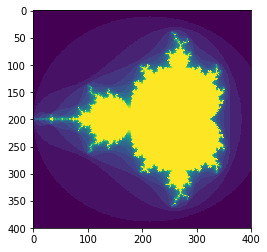

In [61]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime
plt.imshow(mandelbrot(400,400))
plt.show()

#### ix_()函数
ix_函数被用来计算不同的向量的乘积。

In [65]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)
print(ax)
print(bx)
print(cx)
print(ax.shape, bx.shape, cx.shape)
result = ax*bx*cx + ax
print(result)
print(result[3,2,4])
print(a[3]*b[2]*c[4]+a[3])#计算的结果是相同的

[[[2]]

 [[3]]

 [[4]]

 [[5]]]
[[[8]
  [5]
  [4]]]
[[[5 4 6 8 3]]]
(4, 1, 1) (1, 3, 1) (1, 1, 5)
[[[ 82  66  98 130  50]
  [ 52  42  62  82  32]
  [ 42  34  50  66  26]]

 [[123  99 147 195  75]
  [ 78  63  93 123  48]
  [ 63  51  75  99  39]]

 [[164 132 196 260 100]
  [104  84 124 164  64]
  [ 84  68 100 132  52]]

 [[205 165 245 325 125]
  [130 105 155 205  80]
  [105  85 125 165  65]]]
65
65


### 线性代数
提供基本的线性代数操作
#### 简单的数组操作


In [66]:
import numpy as np
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)
a.transpose()
np.linalg.inv(a)
u = np.eye(2) # unit 2x2 matrix; "eye" represents "I"
j = np.array([[0.0, -1.0], [1.0, 0.0]])
np.dot (j, j) # 点积
np.trace(u)  # 矩阵的迹
y = np.array([[5.], [7.]])
print(np.linalg.solve(a, y))#解线性方程组
print(np.linalg.eig(j))#计算特征值


[[ 1.  2.]
 [ 3.  4.]]
[[-3.]
 [ 4.]]
(array([ 0.+1.j,  0.-1.j]), array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
       [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))


### 小技巧和小贴士
#### 自动更改数组大小
在更改数组大小时，你可以省略一个维度的大小，这个维度的大小会自动计算出来

In [68]:
a = np.arange(30)
a.shape = 2,-1,3  # -1 表示自动计算大小
print(a.shape)


(2, 5, 3)


#### 直方图


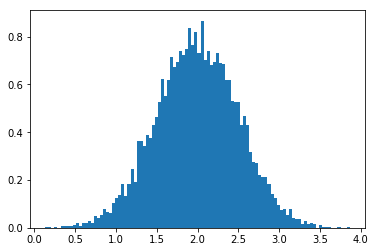

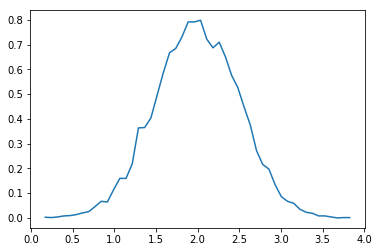

In [72]:
import numpy as np
import matplotlib.pyplot as plt
mu,sigma=2,0.5
v=np.random.normal(mu,sigma,10000)
#matplotlib版本
plt.hist(v,bins=100,normed=1)
plt.show()
#NumPy版本
(n, bins) = np.histogram(v, bins=50, normed=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()